Resumo e um pouco de visualização no pandas

Vamos ver alguns métodos para analisar nossas tabelas, além disso, vamos usar os plots de gráfico padrões do pandas, mas no projeto de DataScience veremos outras mais bonitas e também muito práticas.

O pandas usa o matplotlib, que vimos na seção de módulos e bibliotecas, para plotar gráficos. Se quiser personalizar mais do que o padrão do pandas, importe o matplotlib e use os métodos do matplotlib



In [4]:
import pandas as pd

# Lendo os arquivos CSV da empresa
vendas_df = pd.read_csv(r'Contoso - Vendas - 2017.csv', sep=';')
produtos_df = pd.read_csv(r'Contoso - Cadastro Produtos.csv', sep=';', encoding='ISO8859-1')
lojas_df = pd.read_csv(r'Contoso - Lojas.csv', sep=';', encoding='ISO8859-1')
cliente_df = pd.read_csv(r'Contoso - Clientes.csv', sep=';', encoding='ISO8859-1')

# Renomeando colunas para padronizar as tabelas
produtos_df = produtos_df.rename(columns={'ÿNome do Produto': 'Nome Produto'})
lojas_df = lojas_df.rename(columns={'ÿID Loja': 'ID Loja'})
cliente_df = cliente_df.rename(columns={'ÿID Cliente': "ID Cliente"})
cliente_df = cliente_df.rename(columns={'E-mail': 'E-mail do Cliente'})


# Filtrando colunas necessárias a tabela
cliente_df = cliente_df[['ID Cliente', 'E-mail do Cliente']]
produtos_df = produtos_df[['ID Produto', 'Nome Produto']]
lojas_df = lojas_df[['ID Loja', 'Nome da Loja']]

# Associando as tabelas pela ID
vendas_df = vendas_df.merge(produtos_df, on='ID Produto')
vendas_df = vendas_df.merge(lojas_df, on='ID Loja')
vendas_df = vendas_df.merge(cliente_df, on='ID Cliente')

#display(vendas_df)


Qual Cliente comprou mais vezes?

Usaremos o método .value()_conuts() para contar quantas vezes cada valor do DataFrame aparece

Usaremos o método .plot() para exibir um gráfico

Clientes que mais compraram


E-mail do Cliente
karen33@adventure-works.com        77
chloe77@adventure-works.com        74
julia43@adventure-works.com        69
destiny66@adventure-works.com      68
gilbert9@adventure-works.com       68
josé64@adventure-works.com         68
karen16@adventure-works.com        68
luis31@adventure-works.com         67
isabella85@adventure-works.com     65
miguel5@adventure-works.com        63
sydney79@adventure-works.com       58
lauren24@adventure-works.com       58
katherine66@adventure-works.com    56
calvin20@adventure-works.com       56
wiacomic@linkedin.com              56
chuftonre@youtu.be                 56
julia81@adventure-works.com        55
givell8a@weebly.com                53
nchaundyh7@dot.gov                 53
ealdwincklec2@ox.ac.uk             53
Name: count, dtype: int64

<Axes: xlabel='E-mail do Cliente'>

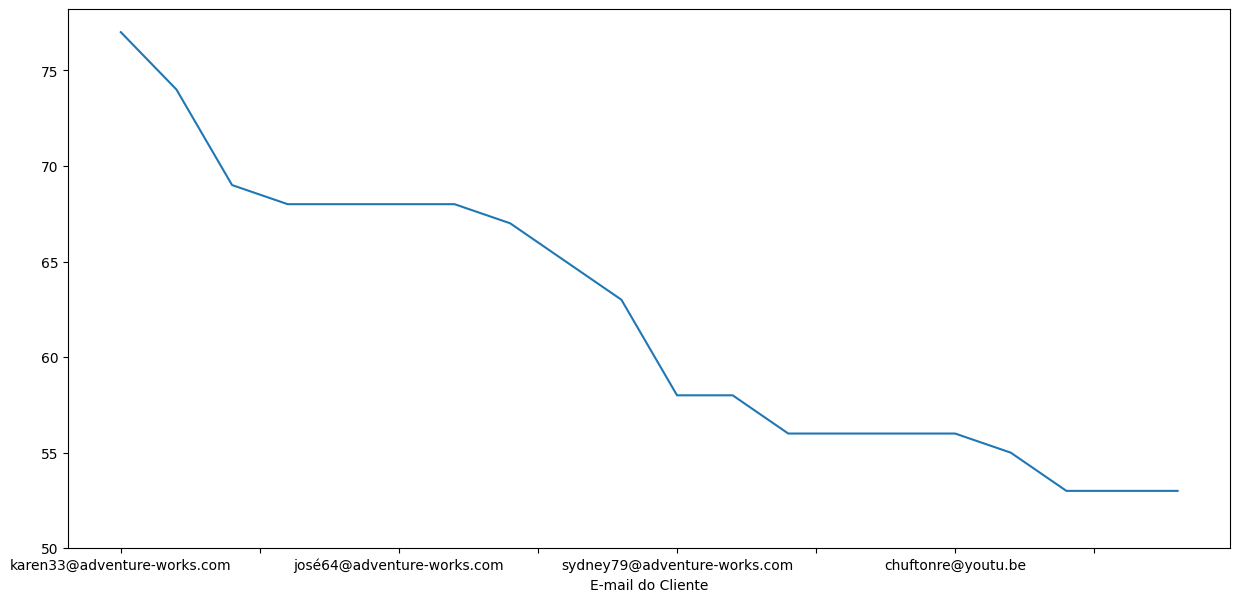

In [5]:
# O método .value_counts() retorna a quantidade de vezes que um determinado valor aparece na lista, este valor é passado como parâmetro de indexação
# na variavel que guarda a tabela a ser analisada.

frequencia_clientes = vendas_df['E-mail do Cliente'].value_counts()
print('Clientes que mais compraram')
display(frequencia_clientes[:20])

frequencia_clientes[:20].plot(figsize=(15, 7), yticks=range(50, 80, 5))

,Quantidade Vendida
Nome da Loja,
Loja Contoso Catalog,1029117
Loja Contoso North America Online,701961
Loja Contoso Europe Online,616845
Loja Contoso Asia Online,578458
Loja Contoso North America Reseller,520176


<Axes: xlabel='Nome da Loja'>

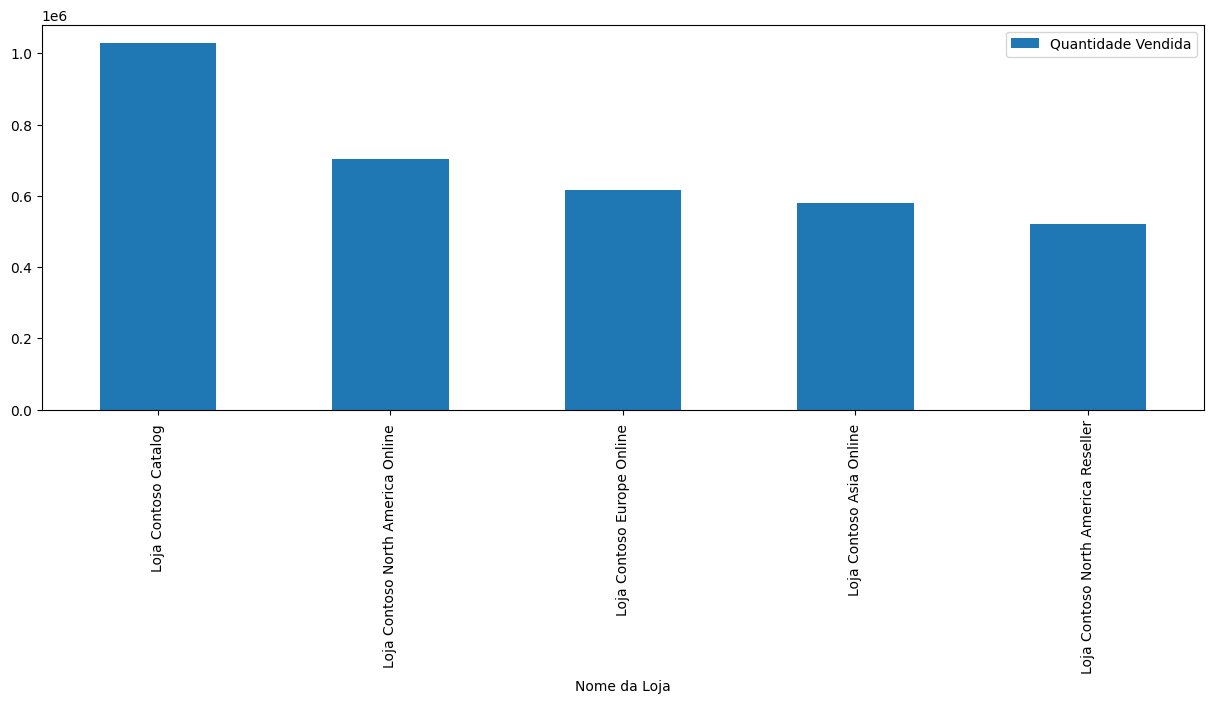

In [21]:
# Vamos agrupar elementos de nossa tabela pelo seu valor, neste caso, precisaremos retornar qual loja vendeu mais, logo, agruparemos todas as lojas e
# somaremos suas respectivas vendas para assim, poder ordená-las e saber a ordem das lojas mais rentáveis, para isso, usaremos o método .groupby()
vendas_lojas = vendas_df[['Nome da Loja', 'Quantidade Vendida']]
vendas_lojas = vendas_lojas.groupby('Nome da Loja').sum()

vendas_lojas = vendas_lojas.sort_values('Quantidade Vendida', ascending=False)
                                                        
display(vendas_lojas[:5])

vendas_lojas[:5].plot(figsize=(15, 5), kind='bar')




In [31]:
maior_valor = vendas_lojas['Quantidade Vendida'].max()

melhor_loja = vendas_lojas['Quantidade Vendida'].idxmax()

print(f'Loja que mais vendeu:\n{melhor_loja}R$ {maior_valor:.2f}')

Loja que mais vendeu:
Loja Contoso Catalog R$ 1029117.00


In [32]:
menor_valor = vendas_lojas['Quantidade Vendida'].min()
pior_loja = vendas_lojas['Quantidade Vendida'].idxmin()

print(f'Loja que menos vendeu:\n{pior_loja}R$ {menor_valor:.2f}')


Loja que menos vendeu:
Loja Contoso Venezia R$ 234.00
